In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


## Data Cleaning

- Sex columns will either be male or female
- Removed the dollar sign from charges column and converted to a float
- Dropped negative age values
- Converted negative children values to 0
- Converted all regions to lowercase
- Dropped any missing vlaues



In [3]:
insurance['sex'] = insurance['sex'].replace({'M': 'male', 'man': 'male', 'F': 'female', 'woman': 'female'})

insurance['charges'] = insurance['charges'].replace({'\$': ''}, regex=True).astype(float)

insurance = insurance[insurance["age"] > 0]

insurance.loc[insurance["children"] < 0, "children"] = 0

insurance["region"] = insurance["region"].str.lower()

insurance.dropna(inplace=True)

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)

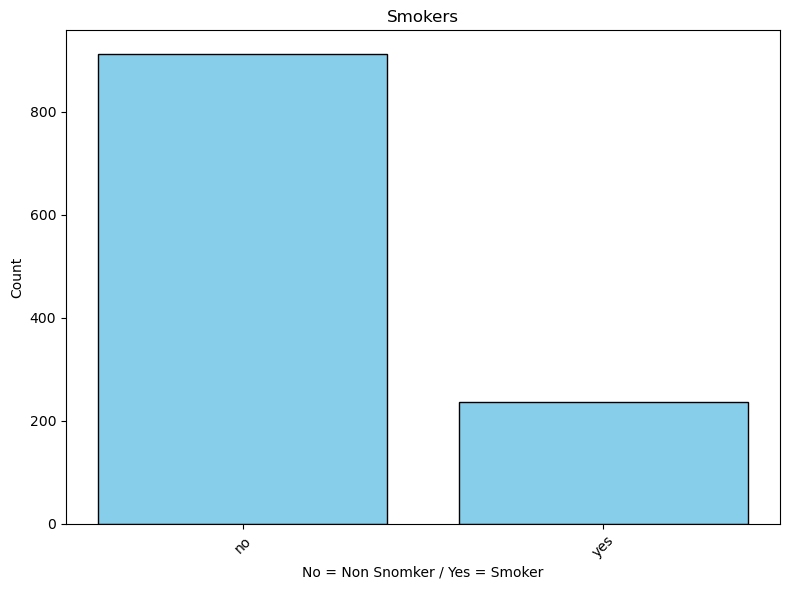

In [5]:
smoke_count = insurance['smoker'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(smoke_count.index, smoke_count.values, color='skyblue', edgecolor='black')

plt.title('Smokers')
plt.xlabel('No = Non Snomker / Yes = Smoker')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

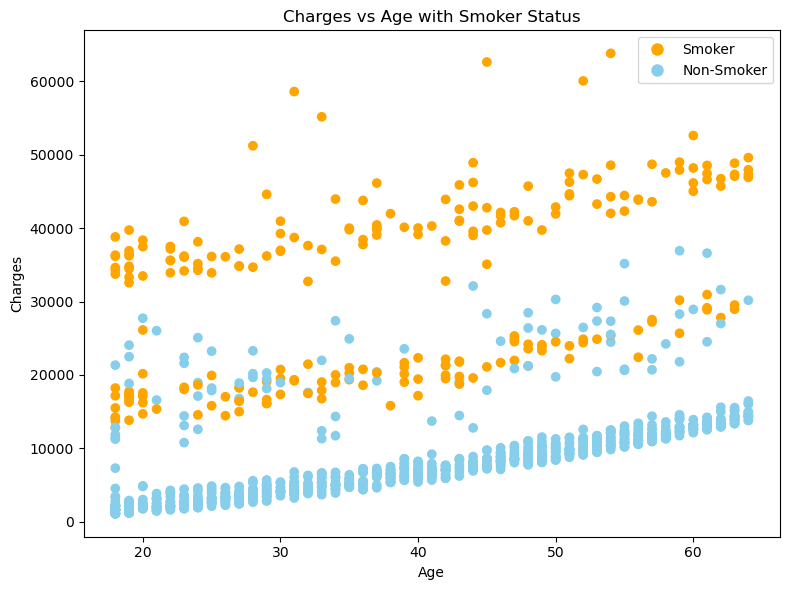

In [6]:
plt.figure(figsize=(8, 6))

plt.scatter(insurance['age'], insurance['charges'], color=insurance['smoker'].map({'yes': 'orange', 'no': 'skyblue'}))

plt.title('Charges vs Age with Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Smoker', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Non-Smoker', markerfacecolor='skyblue', markersize=10)
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()


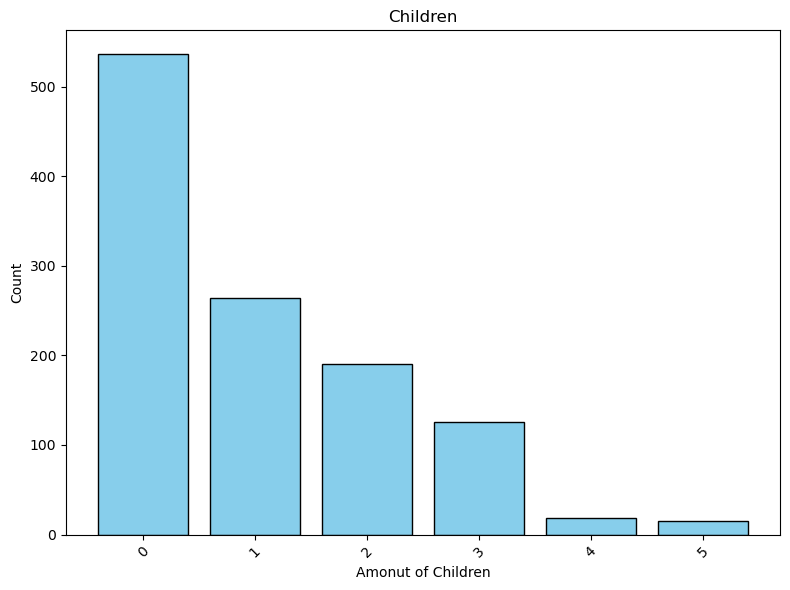

In [7]:
children_count = insurance['children'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(children_count.index, children_count.values, color='skyblue', edgecolor='black')

plt.title('Children')
plt.xlabel('Amonut of Children')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

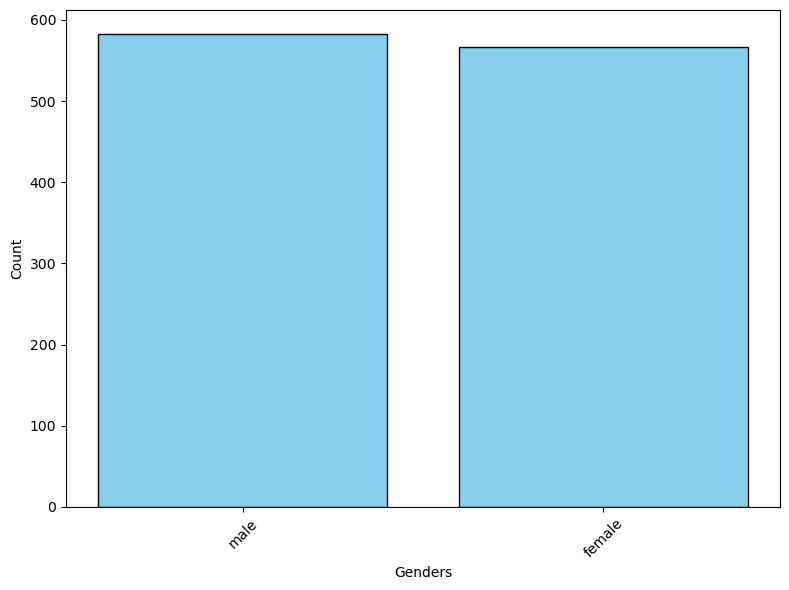

In [8]:
sex_count = insurance['sex'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(sex_count.index, sex_count.values, color='skyblue', edgecolor='black')

plt.xlabel('Genders')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

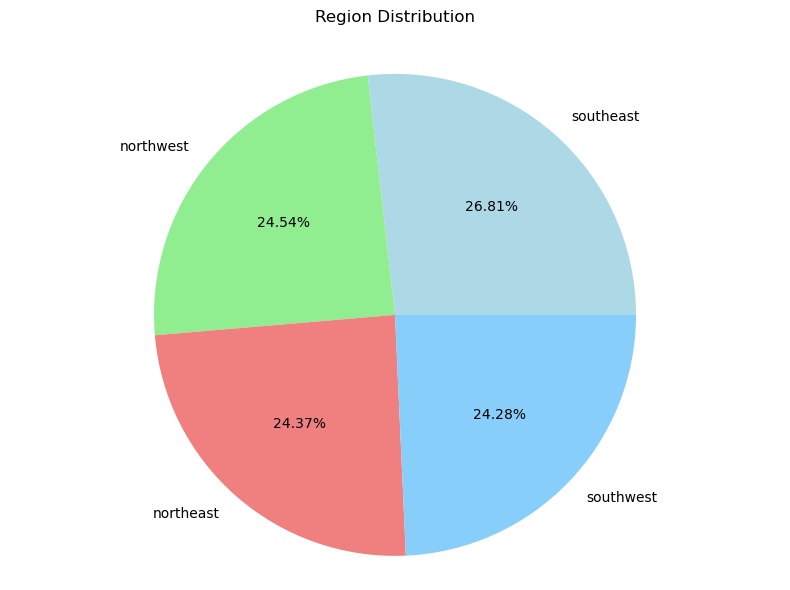

In [9]:
region_count = insurance['region'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(region_count, labels=region_count.index, autopct='%1.2f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])

plt.title('Region Distribution', pad=20)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [10]:
insurance.describe()

,age,bmi,children,charges
count,1149.000000,1149.000000,1149.000000,1149.000000
mean,39.204526,30.592620,1.017406,13331.073243
std,14.163214,6.124013,1.192183,12171.162115
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.200000,0.000000,4746.344000
50%,39.000000,30.300000,1.000000,9541.695550
75%,51.000000,34.700000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


## Preprocessing

In [11]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Convert categorical variables to dummy variables
X_categorical = pd.get_dummies(X[categorical_features], drop_first=True)

# Combine numerical features with dummy variables
X_processed = pd.concat([X[numerical_features], X_categorical], axis=1)

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

## Models

- Linear Regression
- Ridge
- Lasso
- Decision Trees
- Random Forest
- Gradient Boosting

In [12]:
# Linear regression model
lin_reg = LinearRegression()

# Fitting the model
lin_reg.fit(X_scaled, y)

# Calculate mean squared error using cross-validation
mse_scores_lr = -cross_val_score(lin_reg, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
mean_mse_lr = round(np.mean(mse_scores_lr), 4)

# Calculate mean cross-validation score
cv_score_lr = cross_val_score(lin_reg, X_scaled, y, cv=10)
mean_cv_lr = round(np.mean(cv_score_lr), 4)

# Calculate training accuracy
training_acc_lr = round(lin_reg.score(X_scaled, y), 4)

print(f'Mean CV Score: {mean_cv_lr}') 
print(f'Training Acc: {training_acc_lr}')
print(f'Mean MSE: {mean_mse_lr}')  

Mean CV Score: 0.7428
Training Acc: 0.7515
Mean MSE: 37481603.6904


In [13]:
# Ridge regression model
ridge = Ridge(random_state=1)

# Fitting the model
ridge.fit(X_scaled, y)

# Calculate mean squared error using cross-validation
mse_scores_rg = -cross_val_score(ridge, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
mean_mse_rg = round(np.mean(mse_scores_rg), 4)

# Calculate mean cross-validation score
cv_score_rg = cross_val_score(ridge, X_scaled, y, cv=10)
mean_cv_rg = round(np.mean(cv_score_rg), 4)

# Calculate training accuracy
training_acc_rg = round(ridge.score(X_scaled, y), 4)

print(f'Mean CV Score: {mean_cv_rg}') 
print(f'Training Acc: {training_acc_rg}')
print(f'Mean MSE: {mean_mse_rg}')  

Mean CV Score: 0.7428
Training Acc: 0.7515
Mean MSE: 37480819.9587


In [14]:
# Lasso regression model
lasso = Lasso(random_state=1)

# Fitting the model
lasso.fit(X_scaled, y)

# Calculate mean squared error using cross-validation
mse_scores_lasso = -cross_val_score(lasso, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
mean_mse_lasso = round(np.mean(mse_scores_lasso), 4)

# Calculate mean cross-validation score
cv_score_lasso = cross_val_score(lasso, X_scaled, y, cv=10)
mean_cv_lasso = round(np.mean(cv_score_lasso), 4)

# Calculate training accuracy
training_acc_lasso = round(lasso.score(X_scaled, y), 4)

print(f'Mean CV Score: {mean_cv_lasso}') 
print(f'Training Acc: {training_acc_lasso}')
print(f'Mean MSE: {mean_mse_lasso}')  

Mean CV Score: 0.7428
Training Acc: 0.7515
Mean MSE: 37481334.9099


In [15]:
# Decision Tree Regression model
decision_tree = DecisionTreeRegressor(random_state=1)

# Fitting the model
decision_tree.fit(X_scaled, y)

# Calculate mean squared error using cross-validation
mse_scores_dt = -cross_val_score(decision_tree, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
mean_mse_dt = round(np.mean(mse_scores_dt), 4)

# Calculate mean cross-validation score
cv_score_dt = cross_val_score(decision_tree, X_scaled, y, cv=10)
mean_cv_dt = round(np.mean(cv_score_dt), 4)

# Calculate training accuracy
training_acc_dt = round(decision_tree.score(X_scaled, y), 4)

print(f'Mean CV Score: {mean_cv_dt}') 
print(f'Training Acc: {training_acc_dt}')
print(f'Mean MSE: {mean_mse_dt}')  

Mean CV Score: 0.6987
Training Acc: 0.9985
Mean MSE: 43749341.6557


In [16]:
# Random Forest Regression model
random_forest = RandomForestRegressor(random_state=1)

# Fitting the model
random_forest.fit(X_scaled, y)

# Calculate mean squared error using cross-validation
mse_scores_rf = -cross_val_score(random_forest, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
mean_mse_rf = round(np.mean(mse_scores_rf), 4)

# Calculate mean cross-validation score
cv_score_rf = cross_val_score(random_forest, X_scaled, y, cv=10)
mean_cv_rf = round(np.mean(cv_score_rf), 4)

# Calculate training accuracy
training_acc_rf = round(random_forest.score(X_scaled, y), 4)

print(f'Mean CV Score: {mean_cv_rf}') 
print(f'Training Acc: {training_acc_rf}')
print(f'Mean MSE: {mean_mse_rf}')  

Mean CV Score: 0.8383
Training Acc: 0.9765
Mean MSE: 23437826.4389


In [17]:
# Gradient Boosting Regression model
gradient_boosting = GradientBoostingRegressor(random_state=1)

# Fitting the model
gradient_boosting.fit(X_scaled, y)

# Calculate mean squared error using cross-validation
mse_scores_gb = -cross_val_score(gradient_boosting, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
mean_mse_gb = round(np.mean(mse_scores_gb), 4)

# Calculate mean cross-validation score
cv_score_gb = cross_val_score(gradient_boosting, X_scaled, y, cv=10)
mean_cv_gb = round(np.mean(cv_score_gb), 4)

# Calculate training accuracy
training_acc_gb = round(gradient_boosting.score(X_scaled, y), 4)

print(f'Mean CV Score: {mean_cv_gb}') 
print(f'Training Acc: {training_acc_gb}')
print(f'Mean MSE: {mean_mse_gb}')  


Mean CV Score: 0.8549
Training Acc: 0.9033
Mean MSE: 21038662.4956


In [18]:
results = {"Model": ["LinearRegression",
                     "Ridge","Lasso",
                     "DecisionTree","RandomForest","GradientBoosting"],
          "Mean CV Score": [mean_cv_lr,mean_cv_rg,
                       mean_cv_lasso,mean_cv_dt,mean_cv_rf,
                       mean_cv_gb]}
result_df = pd.DataFrame(data=results)
result_df = result_df.sort_values(by=["Mean CV Score"])
print(result_df.to_string(index=False))

           Model  Mean CV Score
    DecisionTree         0.6987
LinearRegression         0.7428
           Ridge         0.7428
           Lasso         0.7428
    RandomForest         0.8383
GradientBoosting         0.8549


## Hyperparamter Tuning

- Performed hyperparameter tuning using Grid Search Cross-Validation for Random Forest and Gradient Boosting models.
- The tuned models slightly improved their mean cross-validation scores, with Gradient Boosting having a slightly higher score compared to Random Forest.


In [24]:
%%time

# Random Forest Regression model
random_forest = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [8,9,10,11,12], 
    'min_samples_split': [8,9,10,11,12],  
    'min_samples_leaf': [4,6,8,10] 
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_scaled, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_score_rf_tuned = cross_val_score(best_model, X_scaled, y, cv=10)
mean_cv_rf_tuned = round(np.mean(cv_score_rf_tuned), 4)
print(f'Mean CV Score: {mean_cv_rf_tuned}')
print('Training Acc:', round(grid_search.score(X_scaled, y),4))
print('\n')

Best Hyperparameters: {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 300}
Mean CV Score: 0.8591
Training Acc: 0.8931


CPU times: total: 13.6 s
Wall time: 3min 36s


In [25]:
%%time 

# Gradient Boosting Regression model
gradient_boosting = GradientBoostingRegressor(random_state=1)

# Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2], 
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7],  
    'min_samples_leaf': [2,4,6,8] 
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_scaled, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_score_gb_tuned = cross_val_score(best_model, X_scaled, y, cv=10)
mean_cv_gb_tuned = round(np.mean(cv_score_gb_tuned), 4)
print(f'Mean CV Score: {mean_cv_gb_tuned}')
print('Training Acc:', round(grid_search.score(X_scaled, y),4))
print('\n')

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 100}
Mean CV Score: 0.8612
Training Acc: 0.8856


CPU times: total: 3.25 s
Wall time: 48.4 s


In [26]:
results_tuned = {"Tuned Models": ["RandomForest","GradientBoosting"],
          "Mean CV Score": [mean_cv_rf_tuned,mean_cv_gb_tuned]}
result_df_tuned = pd.DataFrame(data=results_tuned)
result_df_tuned = result_df_tuned.sort_values(by=["Mean CV Score"])
print(result_df_tuned.to_string(index=False))

    Tuned Models  Mean CV Score
    RandomForest         0.8591
GradientBoosting         0.8612


## Conclusion

- Both Random Forest and Gradient Boosting models performed well in predicting insurance charges.
- Gradient Boosting showed slightly better performance after hyperparameter tuning.